In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
import transformers
from transformers import BertTokenizer, BertModel, AutoModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


2025-10-07 17:06:20.629179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ravi/miniconda3/envs/deepLearn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
df = pd.read_csv('emails.csv')
print(df.head(10))


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
5  Subject: great nnews  hello , welcome to medzo...     1
6  Subject: here ' s a hot play in motion  homela...     1
7  Subject: save your money buy getting this thin...     1
8  Subject: undeliverable : home based business f...     1
9  Subject: save your money buy getting this thin...     1


In [3]:
# check class distribution
df['spam'].value_counts(normalize = True)

spam
1    1.0
Name: proportion, dtype: float64

In [4]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


<Axes: >

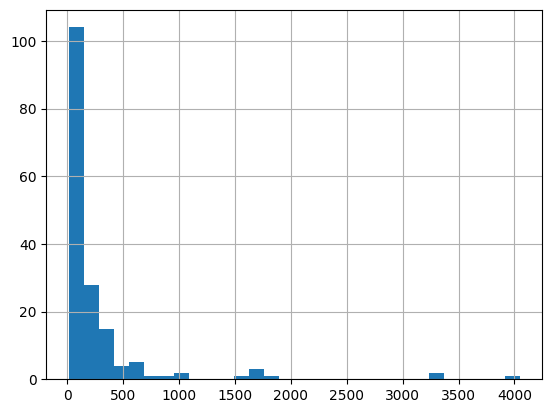

In [5]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in df['text']]

pd.Series(seq_len).hist(bins = 30)

In [6]:
encodings = tokenizer(df['text'].tolist(), padding=True, truncation=True, return_tensors='pt')


In [7]:
encodings

{'input_ids': tensor([[ 101, 3395, 1024,  ...,    0,    0,    0],
        [ 101, 3395, 1024,  ...,    0,    0,    0],
        [ 101, 3395, 1024,  ...,    0,    0,    0],
        ...,
        [ 101, 3395, 1024,  ...,    0,    0,    0],
        [ 101, 3395, 1024,  ...,    0,    0,    0],
        [ 101, 3395, 1024,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [8]:
bert = bert.half()
bert = bert.to(device)# convert to half precision

# Move encodings to same device
input_ids = encodings['input_ids'].to(device)
attention_mask = encodings['attention_mask'].to(device)

In [19]:
with torch.no_grad():  # no gradient calculation (we're not training)
    outputs = bert(input_ids=input_ids, attention_mask=attention_mask)
    hidden_states = outputs.last_hidden_state   # shape: (batch_size, seq_len, hidden_size=768)


In [20]:
sentence_embeddings = hidden_states[:, 0, :]  # shape: (batch_size, 768)


In [ ]:
embeddings = sentence_embeddings.cpu().numpy()


In [26]:
embeddings.shape

(168, 768)